In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 开始进入到数据挖掘的学习
## 分析和认识数据，是数据挖掘的第一步
* 通常先从数据全局进行观察，用到的pandas有head(),describe(),info()等，对数据全局有个初步的认识
* 利用画图的方式，对某一列特征进行分析，可以从特征的分布情况、均值、方差、中位数等进行分析，对数据进行细粒度分析
* 可以利用现有特征的加减乘除等建立高阶特征，当然这些特征一般要求有意义，可解释

## 加载数据，查看前10条数据

In [100]:
data=pd.read_csv('lianjia_qy.csv')
data.head()

,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,...,房屋用途,房屋年限,产权所属,抵押信息,房本备件,小区名称,所在区域,二级区域,单价(元/平米),总价(万元)
0,3室2厅1厨2卫,高楼层 (共28层),124㎡,暂无数据,暂无数据,塔楼,北,钢混结构,毛坯,两梯四户,...,普通住宅,暂无数据,非共有,暂无数据,未上传房本照片,云山诗意花园一期,清城区,横荷,8468,105.0
1,2室2厅1厨1卫,低楼层 (共19层),75.02㎡,暂无数据,59.56㎡,暂无数据,东北 东南,未知结构,精装,三梯十二户,...,普通住宅,满两年,共有,无抵押,已上传房本照片,美汇半岛,清城区,清城,8665,65.0
2,2室1厅1厨1卫,低楼层 (共19层),57.42㎡,暂无数据,47.33㎡,平房,北,钢混结构,简装,两梯八户,...,普通住宅,满五年,非共有,有抵押 7万元 中国银行 客户偿还,已上传房本照片,丽景轩,清城区,清城,6409,36.8
3,2室2厅1厨2卫,中楼层 (共8层),90.18㎡,暂无数据,81.98㎡,暂无数据,南,框架结构,精装,一梯四户,...,普通住宅,满五年,非共有,无抵押,已上传房本照片,清远第一城,清城区,新城,6853,61.8
4,3室1厅1厨1卫,高楼层 (共8层),57㎡,暂无数据,57㎡,暂无数据,北,未知结构,简装,一梯两户,...,普通住宅,满五年,非共有,无抵押,已上传房本照片,清和大道153号,清新区,清新,4351,24.8


In [101]:
data.describe()

,单价(元/平米),总价(万元)
count,2950.000000,2950.000000
mean,8560.211186,102.563085
std,2111.241027,59.492855
min,2572.000000,8.800000
25%,7481.000000,68.000000
50%,8406.000000,93.000000
75%,9501.500000,120.000000
max,22138.000000,698.000000


In [102]:
data['所在区域'].value_counts()

清城区    2642
清新区     308
Name: 所在区域, dtype: int64

([<matplotlib.patches.Wedge at 0x1c5990c6e80>,
 [Text(-1.0413561312410018, 0.3543690278886878, '清远区'),
  Text(1.0413561395356072, -0.35436900351398826, '清新区')],
 [Text(-0.5680124352223646, 0.19329219703019332, '89.56%'),
  Text(0.5680124397466948, -0.19329218373490267, '10.44%')])

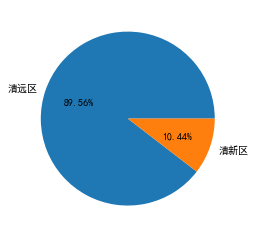

In [103]:
plt.pie(data['所在区域'].value_counts(),labels=['清远区','清新区'],autopct='%.2f%%')

## 清远区房子单价散点图

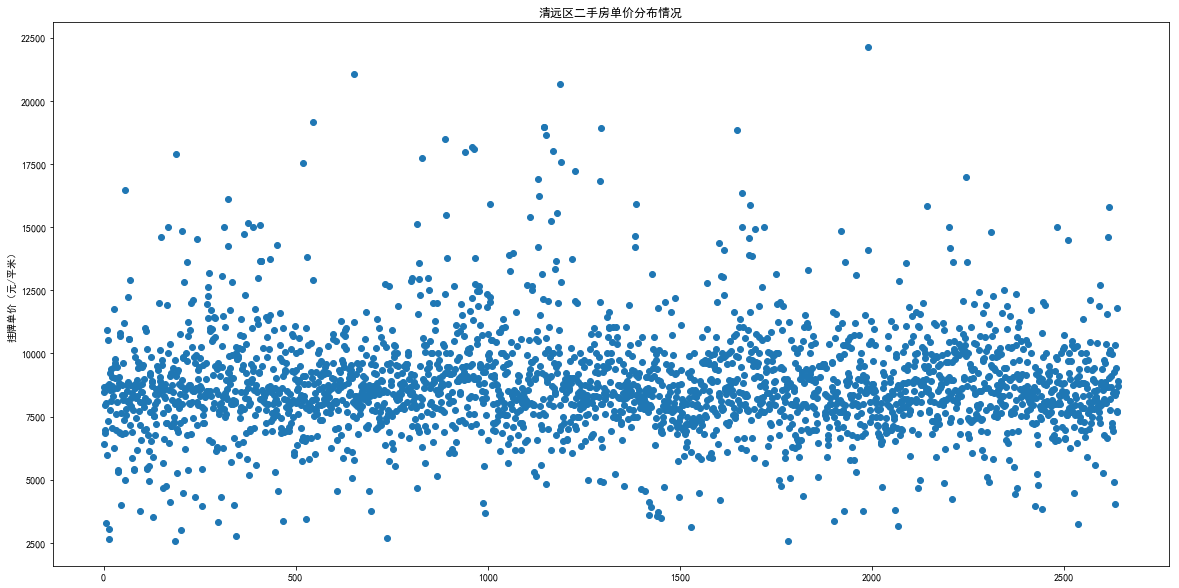

In [104]:
fig1=plt.figure(figsize=(20,10))
qy_price=data[data['所在区域']=='清城区']['单价(元/平米)']
qy_price_mean=qy_price.mean()
plt.ylabel('挂牌单价（元/平米）')
plt.title('清远区二手房单价分布情况')
plt.scatter(np.arange(len(qy_price)),qy_price)

## 清新区房子单价散点图

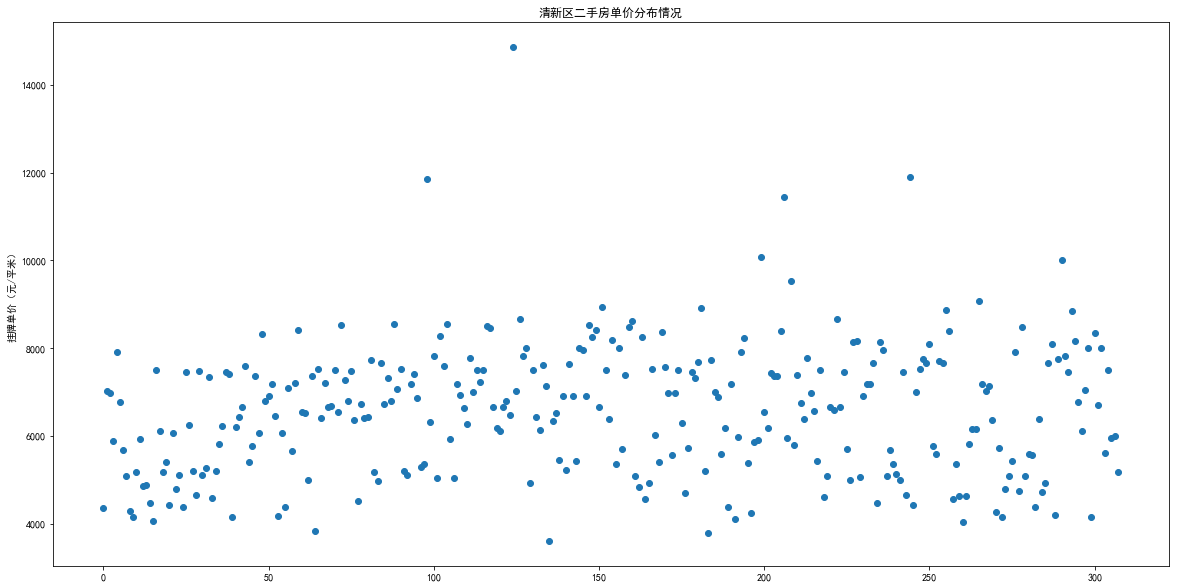

In [105]:
fig2=plt.figure(figsize=(20,10))
qx_price=data[data['所在区域']=='清新区']['单价(元/平米)']
qx_price_mean=qx_price.mean()
plt.ylabel('挂牌单价（元/平米）')
plt.title('清新区二手房单价分布情况')
plt.scatter(np.arange(len(qx_price)),qx_price)

## 清远区与清新区二手房均价条形图

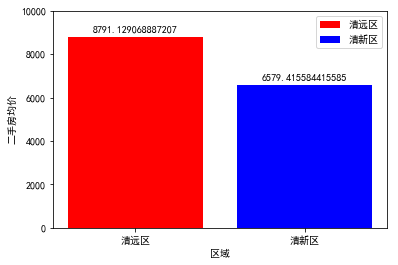

In [106]:
bar1=plt.bar(x='清远区',color='red',height=qy_price_mean,label='清远区')
bar2=plt.bar(x='清新区',color='blue',height=qx_price_mean,label='清新区')
plt.ylim(0,10000)
plt.ylabel('二手房均价')
plt.xlabel('区域')
plt.legend()
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x()+0.4, height+150, str(height), ha="center", va="bottom")
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x()+0.4, height+150, str(height), ha="center", va="bottom")
plt.show()

## 查看小区房源数量分布
1.学习series的筛选；
2.学习绘制条形图；

In [107]:
xiaoqu=data['小区名称'].value_counts()
xiaoqu_morethan_25=xiaoqu[xiaoqu>25]

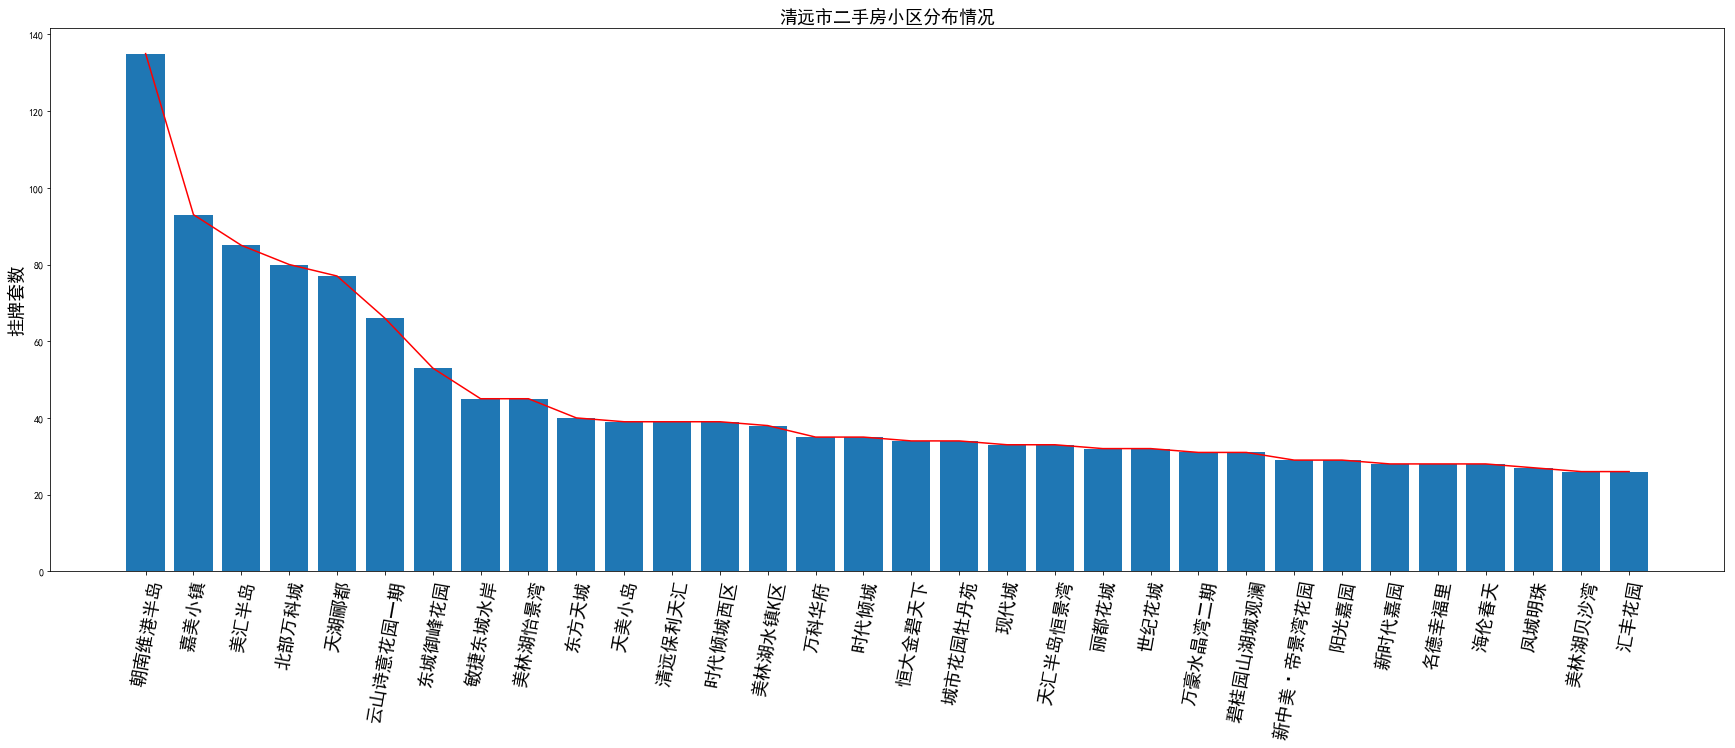

In [108]:
#创建一个画板
fig= plt.figure()
#修改画板的大小
fig.set_size_inches(30,10)
plt.bar(x=xiaoqu_morethan_25.index,height=xiaoqu_morethan_25.values,width=0.8,)
plt.plot(xiaoqu_morethan_25.index,xiaoqu_morethan_25.values,color='red')
plt.xticks(xiaoqu_morethan_25.index,size=18,rotation=80) #设置字体大小和字体倾斜度
plt.ylabel('挂牌套数',fontsize=18)
plt.title('清远市二手房小区分布情况',fontsize=18)
plt.show()

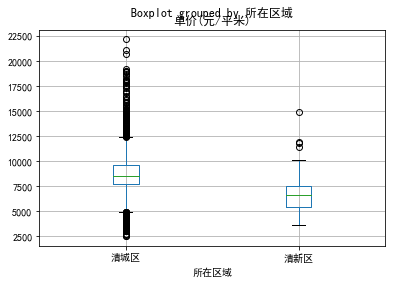

In [109]:
#绘制箱线图
data.boxplot(column='单价(元/平米)',by='所在区域')

## 查看户型分布

In [110]:
huxing=data['房屋户型'].value_counts()
huxing

3室2厅1厨2卫    1231
2室2厅1厨1卫     407
4室2厅1厨2卫     305
3室2厅1厨1卫     269
2室1厅1厨1卫     143
            ... 
4室3厅1厨6卫       1
6室3厅1厨4卫       1
4室3厅1厨2卫       1
7室3厅1厨3卫       1
2室2厅0厨1卫       1
Name: 房屋户型, Length: 69, dtype: int64

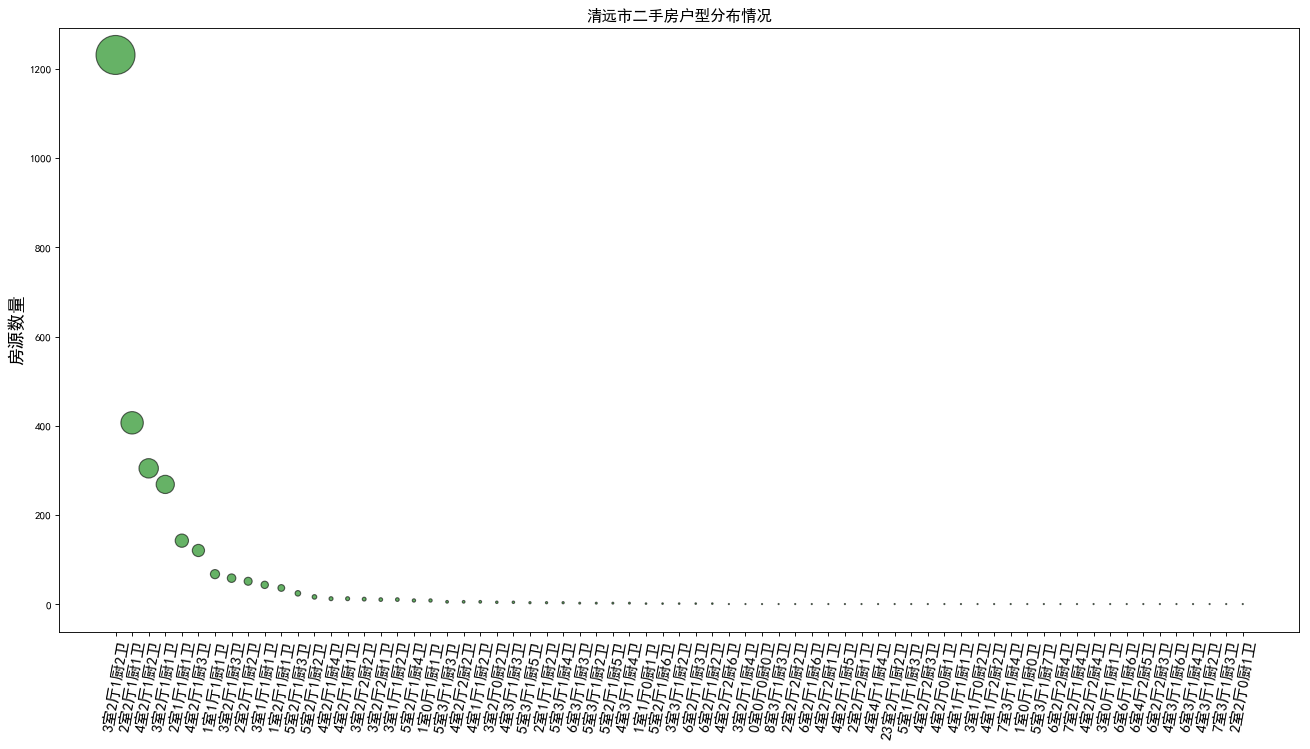

In [111]:
import math
fig=plt.figure(figsize=(20,10),dpi=80)
ax=fig.add_subplot(1,1,1)
plt.scatter(huxing.index,huxing,s=huxing,color='green',marker='o',edgecolor='black',alpha=0.6)
plt.xticks(huxing.index,size=14,rotation=80)
plt.title('清远市二手房户型分布情况',size=14)
plt.ylabel('房源数量',size=16)
plt.show()


## 将户型、小区进行标签编码==>把字符型转化成数据类型，便于数据处理

In [112]:
data['房屋户型'].isna()  #查看房屋户型是否有缺失值

0       False
1       False
2       False
3       False
4       False
        ...  
2945    False
2946    False
2947    False
2948    False
2949    False
Name: 房屋户型, Length: 2950, dtype: bool

In [113]:
data['小区名称'].isna() # 查看小区名称是否有缺失值

0       False
1       False
2       False
3       False
4       False
        ...  
2945    False
2946    False
2947    False
2948    False
2949    False
Name: 小区名称, Length: 2950, dtype: bool

In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
huxing_le=le.fit_transform(data['房屋户型'].values.tolist())
data['huxing_le']=huxing_le
xiaoqu_le=le.fit_transform(data['小区名称'].values.tolist())
data['xiaoqu_le']=xiaoqu_le

In [115]:
data.huxing_le.value_counts()

20    1231
10     407
31     305
19     269
7      143
      ... 
66       1
64       1
62       1
60       1
0        1
Name: huxing_le, Length: 69, dtype: int64

In [116]:
data.xiaoqu_le.value_counts()

240    135
110     93
346     85
76      80
124     77
      ... 
161      1
252      1
250      1
163      1
423      1
Name: xiaoqu_le, Length: 424, dtype: int64

## 绘制二手房户型、所在小区和房屋单价三维散点图

Text(0.5, 0, '单价')

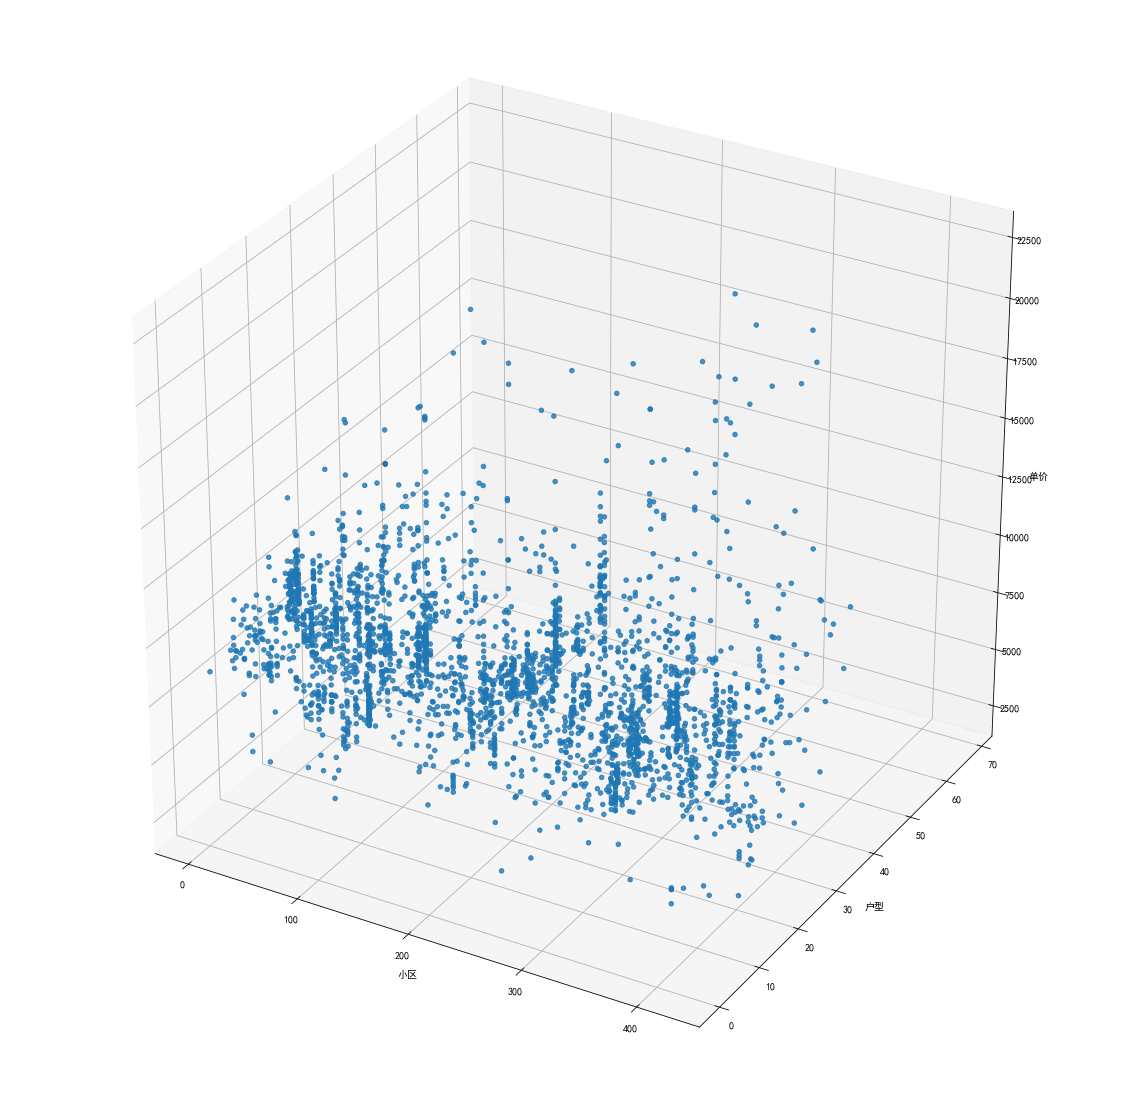

In [117]:
from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(1,1,1,projection='3d')     #绘制三维图
ax.scatter3D(data.xiaoqu_le,data.huxing_le,data['单价(元/平米)'],alpha=0.8)  #绘制三维图表面
ax.set_xlabel('小区')
ax.set_ylabel('户型')
ax.set_zlabel('单价')
# ax.plot3D(data.xiaoqu_le,data.huxing_le,data['单价(元/平米)'], 'gray')
# ax.bar(data.xiaoqu_le,data.huxing_le,data['单价(元/平米)'], zdir='y',  alpha=0.8)

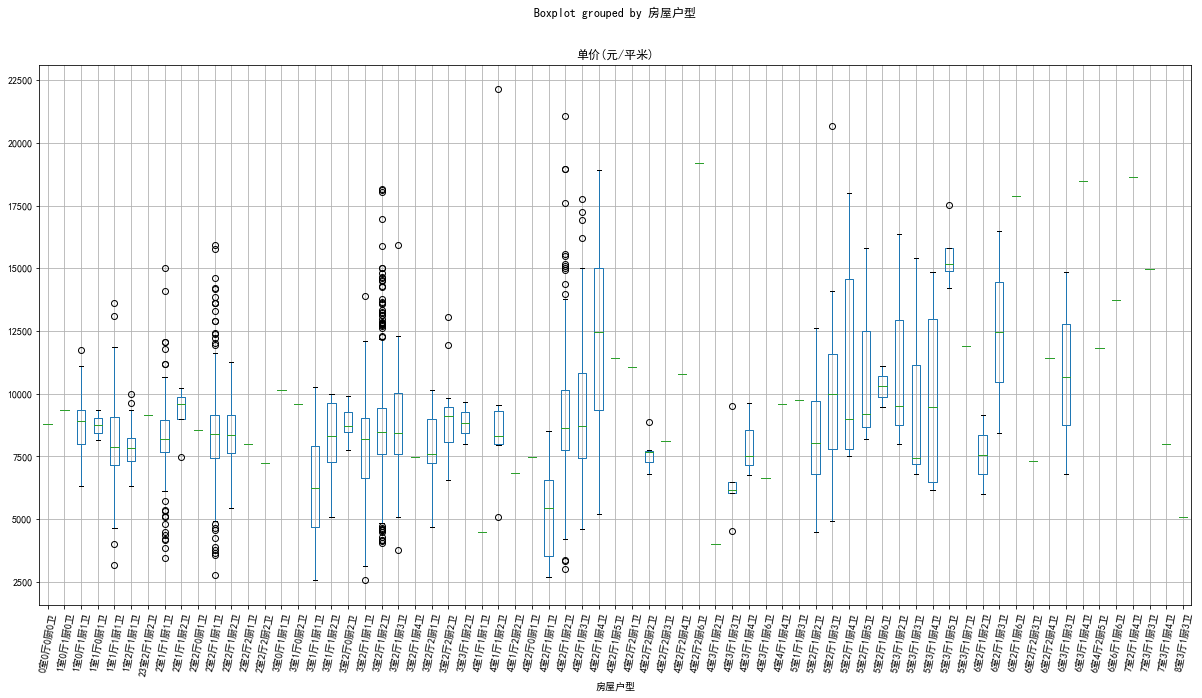

In [118]:
sp=data.boxplot(column='单价(元/平米)',by='房屋户型',figsize=(20,10))
plt.xticks(size=10,rotation=80)
plt.show()

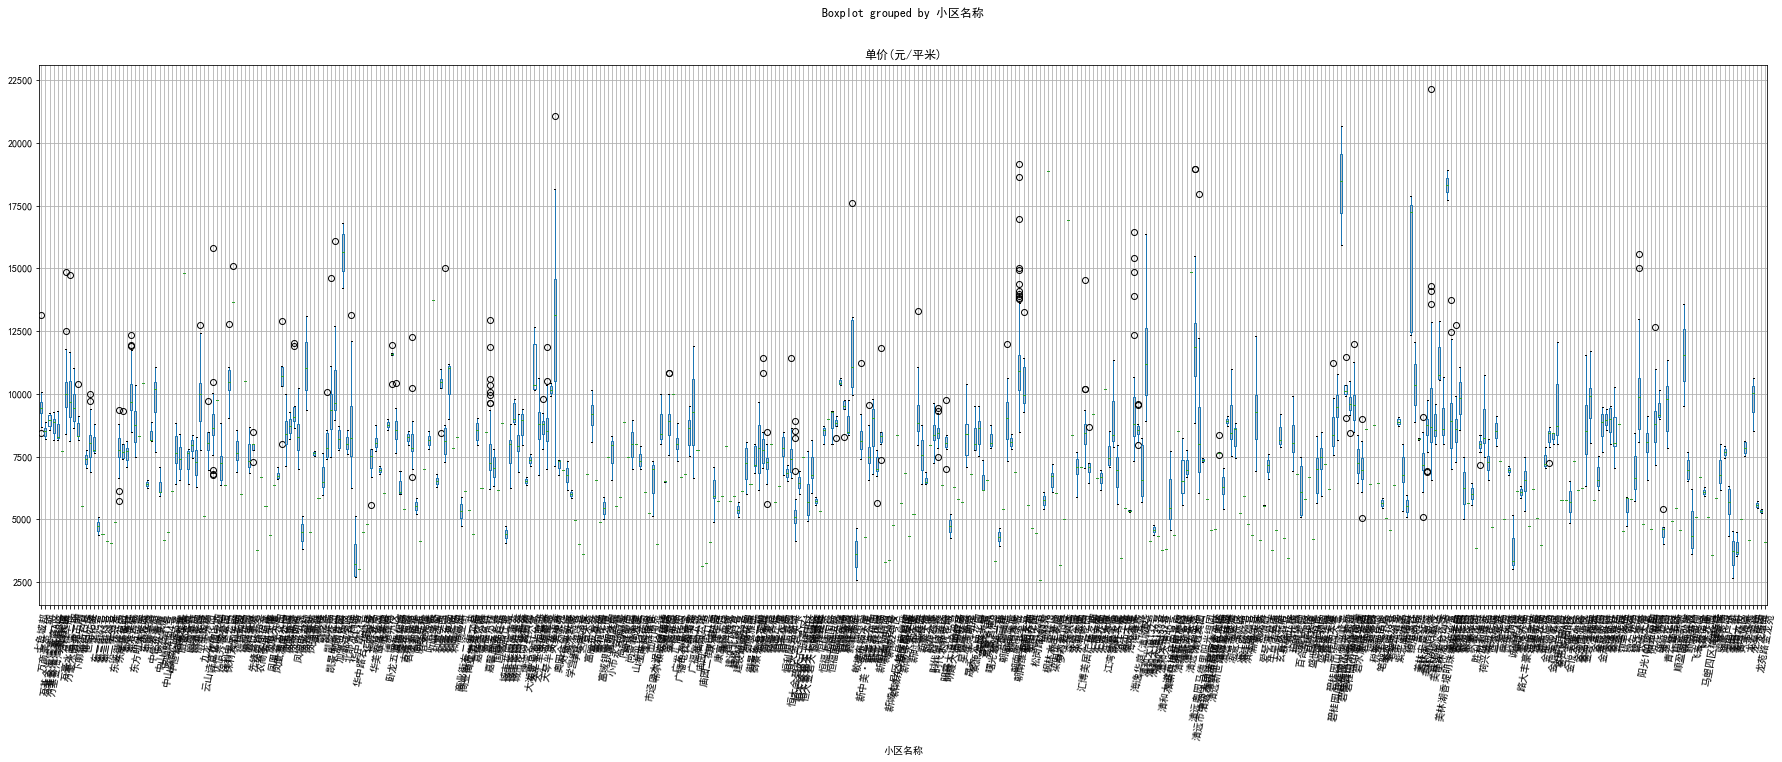

In [119]:
data.boxplot(column='单价(元/平米)',by='小区名称',figsize=(30,10))
plt.xticks(size=10,rotation=80)
plt.show()

In [120]:
data['小区名称'].value_counts()

朝南维港半岛    135
嘉美小镇       93
美汇半岛       85
北部万科城      80
天湖郦都       77
         ... 
尚景家园        1
牛皇庙32座      1
长城大厦        1
税务居宿舍       1
广福家和公馆      1
Name: 小区名称, Length: 424, dtype: int64

In [121]:
# plt.figure(figsize=(20,10))
xq_unq=data['小区名称'].unique()
len(xq_unq)
xq_price_mean=[]  # 每个小区的二手房均价
for xq in xq_unq:
    xq_price_mean.append(data[data['小区名称']==xq]['单价(元/平米)'].mean())

In [122]:
df=DataFrame({'xiaoqu_unq':xq_unq,'xq_price_mean':xq_price_mean})
df=df.sort_values(by='xq_price_mean')
df

,xiaoqu_unq,xq_price_mean
119,松岗路103号,2572.000000
19,华中路54号,3036.000000
333,庙园二街,3143.000000
382,梁围大街13号,3177.000000
417,庙园二街11号,3265.000000
...,...,...
246,加洲岛AB区,15591.250000
294,棕榈湾,16920.000000
248,美林湖香堤明珠绿茵半岛,18328.000000
257,碧桂园山湖城水蓝天芳邻,18359.666667


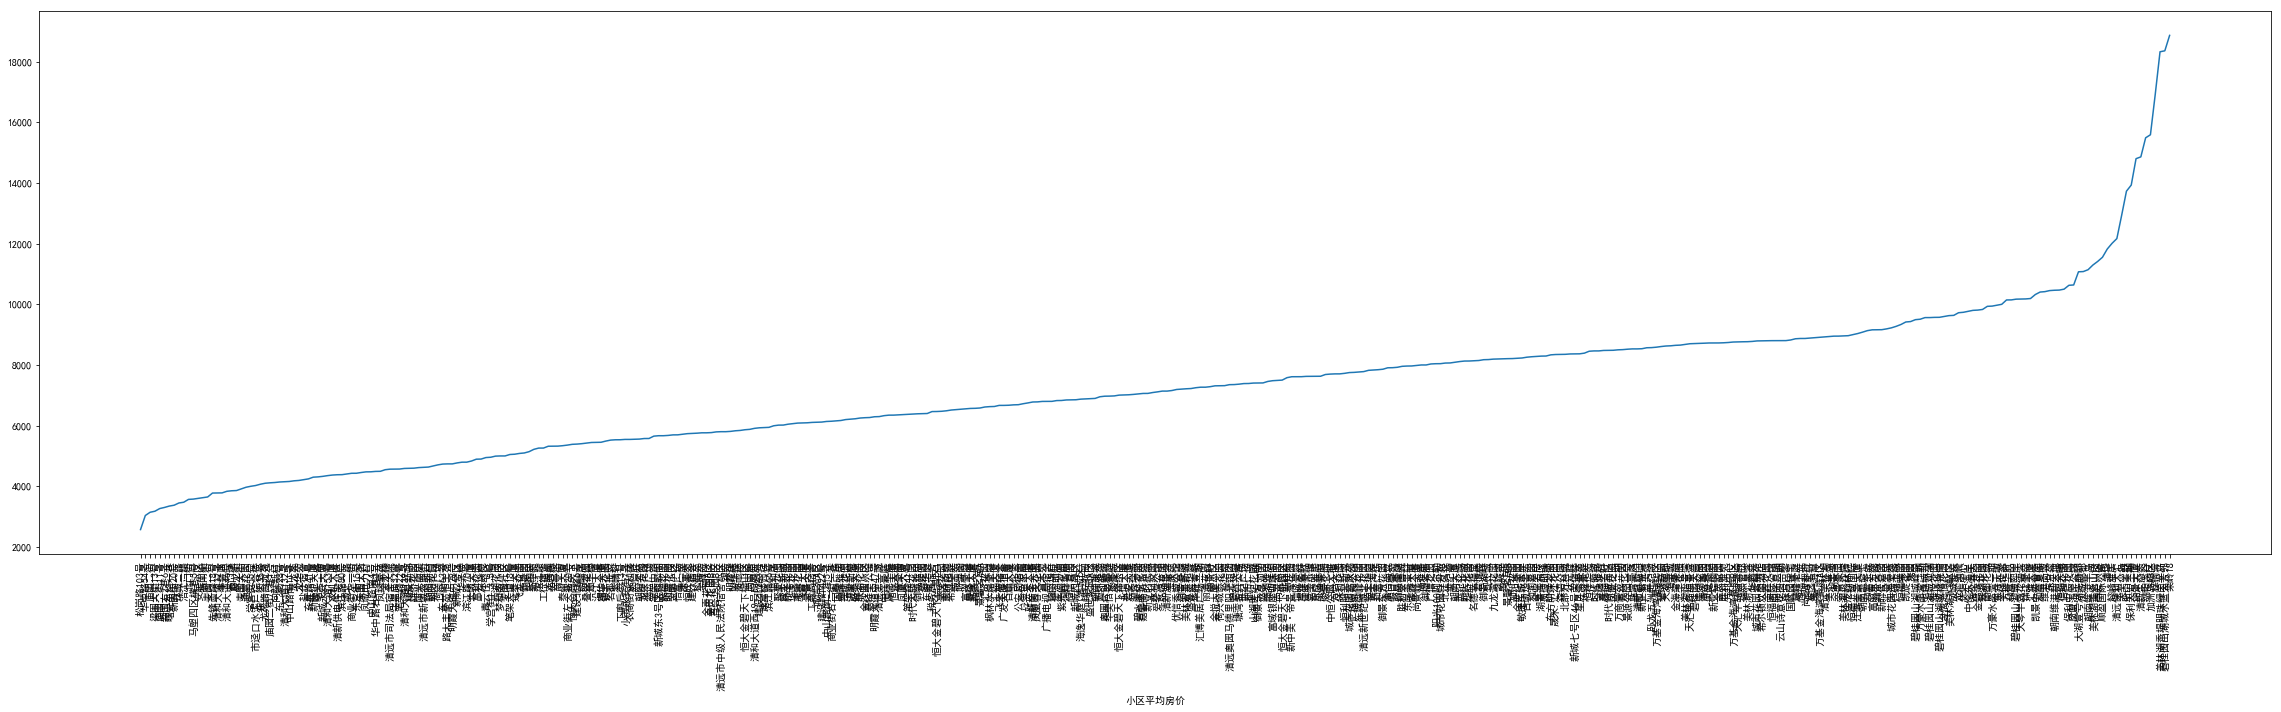

In [123]:
plt.figure(figsize=(40,10))
plt.plot(df['xiaoqu_unq'],df['xq_price_mean'])
plt.xticks(size=10,rotation=90)
plt.xlabel('小区平均房价')
plt.show()

## 进行数据清洗


In [124]:
import re
patten=re.compile(r'共(\d+?)层')
louceng=data['所在楼层'].apply(lambda x:x.split(' ')[0])  # 获取楼层情况
total_louceng=data['所在楼层'].apply(lambda x:re.findall(patten,x.split(' ')[1])[0])  # 获取总楼层情况
total_louceng

0       28
1       19
2       19
3        8
4        8
        ..
2945    31
2946    31
2947    34
2948    17
2949    18
Name: 所在楼层, Length: 2950, dtype: object

In [125]:
data['floor']=louceng
data['total_floors']=total_louceng

In [126]:
area=data['建筑面积'].apply(lambda x:x.split('㎡')[0].strip()) # 把建筑面积处理成数值
area

0         124
1       75.02
2       57.42
3       90.18
4          57
        ...  
2945    71.56
2946    80.34
2947      106
2948    58.33
2949    105.7
Name: 建筑面积, Length: 2950, dtype: object

In [127]:
data['area']=area

In [128]:
data['hasTrade']=data['上次交易'].apply(lambda x: 0 if x=='暂无数据'else 1) # 是否有过交易记录，如果暂无数据则认为是没有交易过

In [129]:
data['hasTrade'].value_counts()

0    2840
1     110
Name: hasTrade, dtype: int64

In [130]:
# data = data.fillna(0)
drop_columns=['所在楼层','房屋户型','建筑面积','户型结构','套内面积','小区名称','总价(万元)','挂牌时间','房本备件','上次交易']
data=data.drop(drop_columns,axis=1)

In [131]:
data=data.dropna()  # 去掉包含空值的行
data

,建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,配备电梯,产权年限,交易权属,房屋用途,房屋年限,...,抵押信息,所在区域,二级区域,单价(元/平米),huxing_le,xiaoqu_le,floor,total_floors,area,hasTrade
0,塔楼,北,钢混结构,毛坯,两梯四户,有,70年,商品房,普通住宅,暂无数据,...,暂无数据,清城区,横荷,8468,20,42,高楼层,28,124,0
1,暂无数据,东北 东南,未知结构,精装,三梯十二户,有,70年,商品房,普通住宅,满两年,...,无抵押,清城区,清城,8665,10,346,低楼层,19,75.02,1
2,平房,北,钢混结构,简装,两梯八户,有,70年,商品房,普通住宅,满五年,...,有抵押 7万元 中国银行 客户偿还,清城区,清城,6409,7,36,低楼层,19,57.42,1
3,暂无数据,南,框架结构,精装,一梯四户,无,70年,商品房,普通住宅,满五年,...,无抵押,清城区,新城,6853,11,290,中楼层,8,90.18,1
4,暂无数据,北,未知结构,简装,一梯两户,暂无数据,70年,商品房,普通住宅,满五年,...,无抵押,清新区,清新,4351,16,274,高楼层,8,57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,暂无数据,东南,钢混结构,精装,两梯六户,有,70年,商品房,普通住宅,暂无数据,...,无抵押,清城区,龙塘,7686,7,110,低楼层,31,71.56,0
2946,暂无数据,东南,钢混结构,精装,两梯六户,有,70年,商品房,普通住宅,暂无数据,...,无抵押,清城区,龙塘,7718,7,110,中楼层,31,80.34,0
2947,塔楼,北,钢混结构,精装,两梯四户,有,70年,商品房,普通住宅,暂无数据,...,有抵押,清城区,新城,11793,20,6,中楼层,34,106,0
2948,塔楼,西南,钢混结构,精装,三梯十八户,有,70年,商品房,普通住宅,暂无数据,...,有抵押,清城区,清城,8915,7,91,低楼层,17,58.33,0


## 使用catboost进行训练，建立二手房单价计算模型

In [134]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data.drop('单价(元/平米)',axis=1),data['单价(元/平米)'],test_size=0.3 , random_state=1234)


737     10910
702      9623
2069     5085
1299     7172
759      7773
Name: 单价(元/平米), dtype: int64

In [176]:
categorical_features_indices = np.where(X_train.dtypes != np.float)[0] # 非数值类型转成类别类型
cb_model=CatBoostRegressor(learning_rate=0.2,cat_features=categorical_features_indices,loss_function='MAE')
cb_model.fit(X_train,y_train)

0:	learn: 6844.3429873	total: 15.8ms	remaining: 15.7s
1:	learn: 5505.3232348	total: 22.8ms	remaining: 11.4s
2:	learn: 4456.9095609	total: 50.5ms	remaining: 16.8s
3:	learn: 3635.2803958	total: 93.8ms	remaining: 23.4s
4:	learn: 2996.6235376	total: 114ms	remaining: 22.7s
5:	learn: 2517.1848396	total: 119ms	remaining: 19.8s
6:	learn: 2132.4351600	total: 131ms	remaining: 18.6s
7:	learn: 1844.9918349	total: 150ms	remaining: 18.7s
8:	learn: 1639.5577777	total: 168ms	remaining: 18.5s
9:	learn: 1491.5346234	total: 182ms	remaining: 18s
10:	learn: 1372.2705449	total: 223ms	remaining: 20.1s
11:	learn: 1286.1461076	total: 285ms	remaining: 23.5s
12:	learn: 1241.4379815	total: 303ms	remaining: 23s
13:	learn: 1166.5254393	total: 344ms	remaining: 24.2s
14:	learn: 1114.9792696	total: 377ms	remaining: 24.7s
15:	learn: 1083.8712375	total: 392ms	remaining: 24.1s
16:	learn: 1051.6726995	total: 408ms	remaining: 23.6s
17:	learn: 1031.8384169	total: 430ms	remaining: 23.5s
18:	learn: 1015.4491528	total: 457ms	r

155:	learn: 691.5701229	total: 6.62s	remaining: 35.8s
156:	learn: 688.9328066	total: 6.67s	remaining: 35.8s
157:	learn: 687.8591910	total: 6.71s	remaining: 35.8s
158:	learn: 686.7703848	total: 6.76s	remaining: 35.7s
159:	learn: 686.4310915	total: 6.8s	remaining: 35.7s
160:	learn: 685.0652281	total: 6.85s	remaining: 35.7s
161:	learn: 684.5734475	total: 6.89s	remaining: 35.7s
162:	learn: 683.5476223	total: 6.95s	remaining: 35.7s
163:	learn: 682.6263446	total: 6.99s	remaining: 35.6s
164:	learn: 682.2042702	total: 7.04s	remaining: 35.6s
165:	learn: 680.9257569	total: 7.08s	remaining: 35.6s
166:	learn: 680.4759652	total: 7.13s	remaining: 35.6s
167:	learn: 679.0977785	total: 7.19s	remaining: 35.6s
168:	learn: 678.0948565	total: 7.24s	remaining: 35.6s
169:	learn: 676.1607168	total: 7.29s	remaining: 35.6s
170:	learn: 675.5141463	total: 7.33s	remaining: 35.5s
171:	learn: 675.0089915	total: 7.38s	remaining: 35.5s
172:	learn: 673.7422604	total: 7.42s	remaining: 35.5s
173:	learn: 673.1221539	total

310:	learn: 567.7103164	total: 14.4s	remaining: 31.8s
311:	learn: 567.1188824	total: 14.4s	remaining: 31.8s
312:	learn: 566.3827047	total: 14.5s	remaining: 31.8s
313:	learn: 566.3784605	total: 14.5s	remaining: 31.7s
314:	learn: 565.0463601	total: 14.6s	remaining: 31.6s
315:	learn: 564.4063236	total: 14.6s	remaining: 31.6s
316:	learn: 564.3277220	total: 14.7s	remaining: 31.6s
317:	learn: 562.6842385	total: 14.7s	remaining: 31.6s
318:	learn: 562.4402660	total: 14.8s	remaining: 31.6s
319:	learn: 562.1025088	total: 14.8s	remaining: 31.5s
320:	learn: 561.3522169	total: 14.9s	remaining: 31.5s
321:	learn: 560.8999246	total: 14.9s	remaining: 31.4s
322:	learn: 560.5591038	total: 15s	remaining: 31.4s
323:	learn: 560.1444029	total: 15s	remaining: 31.4s
324:	learn: 560.0345092	total: 15.1s	remaining: 31.4s
325:	learn: 559.5641687	total: 15.2s	remaining: 31.3s
326:	learn: 558.6569369	total: 15.2s	remaining: 31.3s
327:	learn: 558.2937756	total: 15.3s	remaining: 31.3s
328:	learn: 557.4219238	total: 1

465:	learn: 496.2020418	total: 23.3s	remaining: 26.7s
466:	learn: 495.9991556	total: 23.4s	remaining: 26.7s
467:	learn: 495.8116644	total: 23.4s	remaining: 26.6s
468:	learn: 495.4418118	total: 23.5s	remaining: 26.6s
469:	learn: 495.1007419	total: 23.5s	remaining: 26.5s
470:	learn: 494.8281372	total: 23.6s	remaining: 26.5s
471:	learn: 494.6327744	total: 23.6s	remaining: 26.4s
472:	learn: 494.2184151	total: 23.7s	remaining: 26.4s
473:	learn: 493.7801810	total: 23.7s	remaining: 26.3s
474:	learn: 493.5999813	total: 23.8s	remaining: 26.3s
475:	learn: 493.4975783	total: 23.8s	remaining: 26.2s
476:	learn: 493.3100140	total: 23.9s	remaining: 26.2s
477:	learn: 492.4497225	total: 23.9s	remaining: 26.1s
478:	learn: 491.9472077	total: 24s	remaining: 26.1s
479:	learn: 491.8440368	total: 24.1s	remaining: 26.1s
480:	learn: 491.4771405	total: 24.1s	remaining: 26s
481:	learn: 491.2207959	total: 24.2s	remaining: 26s
482:	learn: 490.8891969	total: 24.2s	remaining: 25.9s
483:	learn: 490.3615085	total: 24.

619:	learn: 440.4006617	total: 32.2s	remaining: 19.7s
620:	learn: 440.1784700	total: 32.2s	remaining: 19.7s
621:	learn: 440.0094662	total: 32.3s	remaining: 19.6s
622:	learn: 439.5649055	total: 32.3s	remaining: 19.6s
623:	learn: 439.3892980	total: 32.4s	remaining: 19.5s
624:	learn: 439.2150242	total: 32.5s	remaining: 19.5s
625:	learn: 438.7959797	total: 32.5s	remaining: 19.4s
626:	learn: 438.7829125	total: 32.6s	remaining: 19.4s
627:	learn: 438.6443832	total: 32.6s	remaining: 19.3s
628:	learn: 438.5464566	total: 32.7s	remaining: 19.3s
629:	learn: 438.1599763	total: 32.7s	remaining: 19.2s
630:	learn: 437.9240093	total: 32.8s	remaining: 19.2s
631:	learn: 437.6468781	total: 32.8s	remaining: 19.1s
632:	learn: 437.2797383	total: 32.9s	remaining: 19.1s
633:	learn: 436.9670790	total: 32.9s	remaining: 19s
634:	learn: 436.6645356	total: 33s	remaining: 19s
635:	learn: 436.5610538	total: 33s	remaining: 18.9s
636:	learn: 435.4915439	total: 33.1s	remaining: 18.9s
637:	learn: 434.6354636	total: 33.2s

773:	learn: 402.2186523	total: 40.4s	remaining: 11.8s
774:	learn: 402.1161463	total: 40.4s	remaining: 11.7s
775:	learn: 402.0934951	total: 40.5s	remaining: 11.7s
776:	learn: 401.8712677	total: 40.5s	remaining: 11.6s
777:	learn: 401.7691151	total: 40.6s	remaining: 11.6s
778:	learn: 401.7508138	total: 40.6s	remaining: 11.5s
779:	learn: 401.7125839	total: 40.7s	remaining: 11.5s
780:	learn: 401.3670622	total: 40.8s	remaining: 11.4s
781:	learn: 400.9185367	total: 40.8s	remaining: 11.4s
782:	learn: 400.8127913	total: 40.9s	remaining: 11.3s
783:	learn: 400.3311924	total: 40.9s	remaining: 11.3s
784:	learn: 400.1451406	total: 41s	remaining: 11.2s
785:	learn: 399.9019993	total: 41s	remaining: 11.2s
786:	learn: 399.8183142	total: 41.1s	remaining: 11.1s
787:	learn: 399.2325901	total: 41.1s	remaining: 11.1s
788:	learn: 398.9457371	total: 41.2s	remaining: 11s
789:	learn: 398.7849128	total: 41.2s	remaining: 11s
790:	learn: 398.5688582	total: 41.3s	remaining: 10.9s
791:	learn: 398.3118137	total: 41.3s

927:	learn: 373.2250956	total: 48.5s	remaining: 3.76s
928:	learn: 373.0547301	total: 48.6s	remaining: 3.71s
929:	learn: 372.9322171	total: 48.6s	remaining: 3.66s
930:	learn: 372.8363319	total: 48.7s	remaining: 3.61s
931:	learn: 372.7041624	total: 48.7s	remaining: 3.56s
932:	learn: 372.6509131	total: 48.8s	remaining: 3.5s
933:	learn: 372.2802959	total: 48.8s	remaining: 3.45s
934:	learn: 371.8391893	total: 48.9s	remaining: 3.4s
935:	learn: 371.8321045	total: 48.9s	remaining: 3.34s
936:	learn: 371.7235586	total: 49s	remaining: 3.29s
937:	learn: 371.6599544	total: 49s	remaining: 3.24s
938:	learn: 371.5610339	total: 49.1s	remaining: 3.19s
939:	learn: 371.4838733	total: 49.1s	remaining: 3.13s
940:	learn: 371.0585921	total: 49.2s	remaining: 3.08s
941:	learn: 370.9888962	total: 49.3s	remaining: 3.03s
942:	learn: 370.9390873	total: 49.3s	remaining: 2.98s
943:	learn: 370.8127789	total: 49.4s	remaining: 2.93s
944:	learn: 370.6617623	total: 49.5s	remaining: 2.88s
945:	learn: 370.5542311	total: 49.

## 回归模型准确度评估(用到sklearn的metrics模块)
* 平均误差(mean absolute error):这是给定数据集的所有数据点的绝对误差平均值

* 均方误差(mean squared error):给定数据集的所有数据点的误差的平方的平均值，最流行

* 中位数绝对误差(mean absolute error)：给定数据集的所有数据点的误差的中位数，可以消除异常值的干扰

* 解释方差分(explained variance score)：用于衡量我们的模型对数据集波动的解释能力，如果得分为1.0，表明我们的模型是完美的。

* R方得分(R2 score)：读作R方，指确定性相关系数，用于衡量模型对未知样本预测的效果，最好的得分为1.0，值也可以是负数。

In [174]:
from sklearn.metrics import median_absolute_error,mean_absolute_error 
y_pred=cb_model.predict(X_valid)
median_absolute_error(y_valid, y_pred)    # 模型准确度计算，MAE，median_absolute_error，中位数绝对误差

586.3479714670611

In [173]:
mean_absolute_error(y_valid,y_pred)

826.7886175207134